In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tiktoken
import requests
import re

In [2]:
#GPT4 tokenzier

tokenizer = tiktoken.get_encoding('cl100k_base')
dir(tokenizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_core_bpe',
 '_encode_bytes',
 '_encode_only_native_bpe',
 '_encode_single_piece',
 '_mergeable_ranks',
 '_pat_str',
 '_special_tokens',
 'decode',
 'decode_batch',
 'decode_bytes',
 'decode_bytes_batch',
 'decode_single_token_bytes',
 'decode_tokens_bytes',
 'decode_with_offsets',
 'encode',
 'encode_batch',
 'encode_ordinary',
 'encode_ordinary_batch',
 'encode_single_token',
 'encode_to_numpy',
 'encode_with_unstable',
 'eot_token',
 'is_special_token',
 'max_token_value',
 'n_vocab',
 'name',
 'special_tokens_set',
 'token_byte_values']

In [3]:
tokenizer??

Type:           Encoding
String form:    <Encoding 'cl100k_base'>
File:           ~/.pyenv/versions/jupyter-env/lib/python3.10/site-packages/tiktoken/core.py
Source:        
class Encoding:
    def __init__(
        self,
        name: str,
        *,
        pat_str: str,
        mergeable_ranks: dict[bytes, int],
        special_tokens: dict[str, int],
        explicit_n_vocab: int | None = None,
    ):
        """Creates an Encoding object.

        See openai_public.py for examples of how to construct an Encoding object.

        Args:
            name: The name of the encoding. It should be clear from the name of the encoding
                what behaviour to expect, in particular, encodings with different special tokens
                should have different names.
            pat_str: A regex pattern string that is used to split the input text.
            mergeable_ranks: A dictionary mapping mergeable token bytes to their ranks. The ranks
                must correspond to merg

In [4]:
#VOCAB SIZE
tokenizer.n_vocab

100277

In [5]:
tokenizer.decode([tokenizer.eot_token])   #EnD OF TEXT token  --> special token

'<|endoftext|>'

In [6]:
#not all tokens are valid, eg:

print(tokenizer.n_vocab)
tokenizer.decode([100261])

# This is to make room for future additions

100277


KeyError: 'Invalid token for decoding: 100261'

In [7]:
#explore some tokens

for i in range(1000,1050):
    print(f'{i} = {tokenizer.decode([i])}')

1000 = indow
1001 = lement
1002 = pect
1003 = ash
1004 = [i
1005 =  use
1006 = .F
1007 = pec
1008 =  ad
1009 = ove
1010 = ception
1011 = ength
1012 = include
1013 = ader
1014 =                            
1015 = atus
1016 = Th
1017 = itle
1018 = rit
1019 = void
1020 = ().
1021 = (

1022 =  off
1023 =  other
1024 =  &&
1025 = ';

1026 = ms
1027 =  been
1028 =  te
1029 = ml
1030 = co
1031 = nc
1032 = 13
1033 = ervice
1034 =  %
1035 = **

1036 = ann
1037 = ade
1038 = 




1039 = lock
1040 = const
1041 = 100
1042 = ponse
1043 =  sup
1044 = ++
1045 = date
1046 =  acc
1047 =  had
1048 =  bu
1049 = 200


## TOkenization

In [8]:
text = 'My name is Raeez and I like toothpaste-flavored chocolate.'
tokens = tokenizer.encode(text)
print(tokens)

[5159, 836, 374, 18989, 2176, 89, 323, 358, 1093, 26588, 57968, 12556, 76486, 18414, 13]


In [9]:
#if you split and tokenize each words, the tokenizn is diff from the whole text  ---  IMP
for word in text.split():
    print(f'"{word}" compirses token(s) {tokenizer.encode(word)}')

"My" compirses token(s) [5159]
"name" compirses token(s) [609]
"is" compirses token(s) [285]
"Raeez" compirses token(s) [56635, 2176, 89]
"and" compirses token(s) [438]
"I" compirses token(s) [40]
"like" compirses token(s) [4908]
"toothpaste-flavored" compirses token(s) [998, 8942, 57968, 12556, 76486]
"chocolate." compirses token(s) [331, 14136, 13]


In [10]:
for t in tokens:
    print(f'Token {t:>6} is "{tokenizer.decode([t])}"')

Token   5159 is "My"
Token    836 is " name"
Token    374 is " is"
Token  18989 is " Ra"
Token   2176 is "ee"
Token     89 is "z"
Token    323 is " and"
Token    358 is " I"
Token   1093 is " like"
Token  26588 is " tooth"
Token  57968 is "paste"
Token  12556 is "-fl"
Token  76486 is "avored"
Token  18414 is " chocolate"
Token     13 is "."


In [11]:
# with special non ASCII chara
tokenizer.encode('Á')

[44801]

## How long are the tokens

In [12]:
# inti lenghts vector
token_lengths = np.zeros(tokenizer.n_vocab)


# get number of char in each token
for idx in range(tokenizer.n_vocab):
    try:
        token_lengths[idx] = len(tokenizer.decode([idx]))
    except:
        token_lengths[idx] = np.nan

#count unique lengths
uniqueLengths, tokenCount = np.unique(token_lengths, return_counts = True)
        

## many word-tokens start withs spaces

In [13]:
# single token words with vs. without spaces
print(tokenizer.encode(' Michael'))
print(tokenizer.encode('Michael'))

[8096]
[26597]


In [14]:
# multi token words witout a space
print(tokenizer.encode(' Peach'))
print(tokenizer.encode('Peach'))

[64695]
[47, 9739]


In [15]:
peach = tokenizer.encode('Peach')
[tokenizer.decode([p]) for p in peach]

['P', 'each']

In [16]:
# Time machine book encoded
text = requests.get('https://www.gutenberg.org/files/35/35-0.txt').text

# split by punctuation
words = re.split(r'([,.:;-?_!"()\']|--|\s)',text)
words = [item.strip() for item in words if item.strip()]
print(f'There are {len(words)} words')
words[10000:10050]

There are 37092 words


['the',
 'strange',
 'flowers',
 'I',
 'saw',
 ',',
 'but',
 'later',
 'I',
 'began',
 'to',
 'perceive',
 'their',
 'import',
 '.',
 '“However',
 ',',
 'I',
 'am',
 'telling',
 'you',
 'of',
 'my',
 'fruit',
 'dinner',
 'in',
 'the',
 'distant',
 'future',
 'now',
 '.',
 'So',
 'soon',
 'as',
 'my',
 'appetite',
 'was',
 'a',
 'little',
 'checked',
 ',',
 'I',
 'determined',
 'to',
 'make',
 'a',
 'resolute',
 'attempt',
 'to',
 'learn']

In [17]:
# tokens of a random word in the text
someRandomWord = np.random.choice(words)
print(f'"{someRandomWord}" has token {tokenizer.encode(someRandomWord)}')

"flames" has token [1517, 986]


In [18]:
for t in words[:20]:
    print(f'"{t}" has {len(tokenizer.encode(t))} tokens')

#EBOOK has 2 tokens

"***" has 1 tokens
"START" has 1 tokens
"OF" has 1 tokens
"THE" has 1 tokens
"PROJECT" has 1 tokens
"GUTENBERG" has 5 tokens
"EBOOK" has 2 tokens
"35" has 1 tokens
"***" has 1 tokens
"The" has 1 tokens
"Time" has 1 tokens
"Machine" has 1 tokens
"An" has 1 tokens
"Invention" has 2 tokens
"by" has 1 tokens
"H" has 1 tokens
"." has 1 tokens
"G" has 1 tokens
"." has 1 tokens
"Wells" has 2 tokens


In [19]:
for spelling in ['book','Book', 'bOok']:
    print(f'"{spelling}" has tokens {tokenizer.encode(spelling)}')
    

"book" has tokens [2239]
"Book" has tokens [7280]
"bOok" has tokens [65, 46, 564]


In [20]:
# DO WE NEED TO SEPERATE THE TEXT INTO WORDS??
#NOT REALLY

# tokenize the raw unprocessed text
tmTokens = tokenizer.encode(text)
print(f'The text has {len(tmTokens):,} tokens and {len(words):,} words.')

The text has 43,053 tokens and 37,092 words.


In [21]:
#check out some tokens
for t in tmTokens[9990:10010]:
    print(f'Token {t:>6}: "{tokenizer.decode([t])}"')

Token    264: " a"
Token   3094: " step"
Token   4741: " forward"
Token     11: ","
Token  20365: " hes"
Token  33337: "itated"
Token     11: ","
Token    323: " and"
Token   1243: " then"
Token  24891: " touched"
Token    856: " my"
Token    319: "
"
Token  10888: "hand"
Token     13: "."
Token   5112: " Then"
Token    358: " I"
Token   6612: " felt"
Token   1023: " other"
Token   8579: " soft"
Token   2697: " little"


## Is there relation b/w no of tokens in a word and no of chara in that word??

In [28]:
tokenCount = np.zeros((len(words),2),dtype=int)
for idx, w in enumerate(words):
    tokenCount[idx,0]= len(w) #first col is length of word
    tokenCount[idx,1]= len(tokenizer.encode(w)) #second  col is number of tokens
    

[Text(0.5, 0, 'word lengths'),
 Text(0, 0.5, 'Encoded token count'),

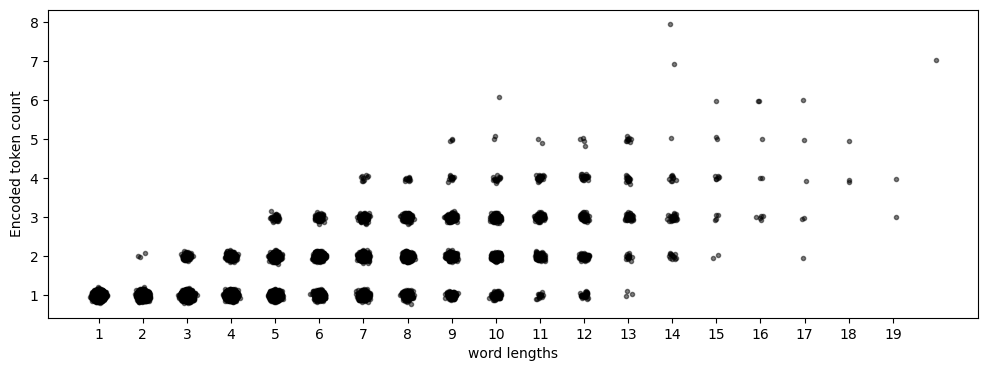

In [37]:
plt.figure(figsize=(12,4))

offsetsX = np.random.randn(len(words))/20  #add offsets for showing density of at a particular cordinate
offsetsY = np.random.randn(len(words))/20

plt.plot(tokenCount[:,0]+offsetsX, tokenCount[:,1]+offsetsY, 'k.',alpha=0.5)
plt.gca().set(xlabel='word lengths', ylabel='Encoded token count', xticks=np.arange(1, 20))

In [35]:
tokenCount[0]

array([3, 1])

## Encdoing of 14 chara words



In [38]:
# find words with chara
wordsWith14Chars = set(np.where(tokenCount[:,0]==14)[0])

# print their tokens
for idx in wordsWith14Chars:
    this_decode = [tokenizer.decode([t]) for t in tokenizer.encode(words[idx]) ]
    print(f'"{words[idx]}" comprises {this_decode}')

"starting-point" comprises ['starting', '-point']
"thud—thud—thud" comprises ['th', 'ud', '—', 'th', 'ud', '—', 'th', 'ud']
"self-restraint" comprises ['self', '-re', 'straint']
"wool-gathering" comprises ['wo', 'ol', '-g', 'athering']
"differentiated" comprises ['different', 'iated']
"north-eastward" comprises ['north', '-east', 'ward']
"constellations" comprises ['const', 'ell', 'ations']
"Time-Dimension" comprises ['Time', '-D', 'imension']
"Time-Dimension" comprises ['Time', '-D', 'imension']
"discriminating" comprises ['disc', 'rim', 'inating']
"disappointment" comprises ['dis', 'appointment']
"expostulations" comprises ['ex', 'post', 'ulations']
"world—mastered" comprises ['world', '—', 'master', 'ed']
"Psychologist’s" comprises ['Psych', 'ologist', '’s']
"south-westward" comprises ['south', '-west', 'ward']
"again—terribly" comprises ['again', '—', 'ter', 'ribly']
"plants—nettles" comprises ['plants', '—', 'nett', 'les']
"mountaineering" comprises ['mount', 'aine', 'ering']
"att

In [40]:
# word efficiency (token efficiency

In [ ]:
# Tokenization can be done words (by manually splitting using whitespaces) or on full raw text

In [49]:
# How many r's in strawberry problem
stb = tokenizer.encode('strawberry')

In [61]:
s = tokenizer.decode(stb)
s

'strawberry'

In [59]:
for t in stb:
    print(tokenizer.decode([t]))

str
aw
berry


In [57]:
stb

[496, 675, 15717]

In [67]:
# decoded version of strawberry
stb_string = tokenizer.decode(stb)
stb_string

'strawberry'

In [66]:
# decoded version of letter r
r = tokenizer.encode('r')
r_string = tokenizer.decode(r)
r_string


'r'

In [68]:
stb_string.count(r_string)

3

In [73]:
tokenizer.decode([496,675,15711])

'straw/main'

In [ ]:
token = [k for k, v in vocab.items() if v == 100][0]
print(token)